In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('spam.csv',encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Cleaning the df

In [4]:
print(df.shape)
df.isna().sum()

(5572, 5)


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df=df.rename(columns={'v1':'Target','v2':'Text'})
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.duplicated().sum()

403

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df['Target']=df['Target'].map({'ham':0,'spam':1})
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


EDA


In [10]:
import nltk

df['num_chars']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


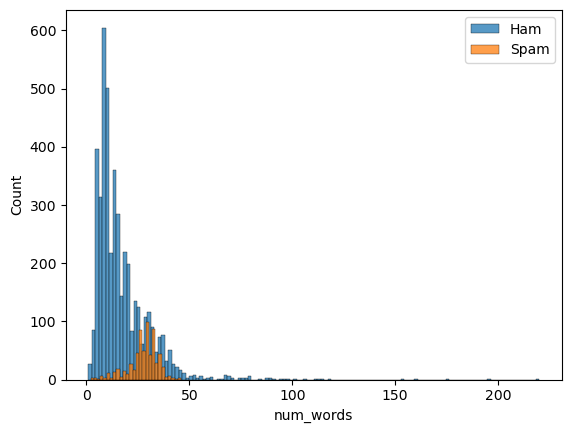

In [11]:
sns.histplot(df[df['Target']==0]['num_words'],label='Ham')
sns.histplot(df[df['Target']==1]['num_words'],label='Spam')
plt.legend()
plt.show()

In [12]:
df[['Target','num_chars','num_words','num_sentences']].corr()

,Target,num_chars,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [13]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [14]:
def transform_text(text):
    
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    y=list(map(lambda x:PorterStemmer().stem(x),y))
    y=" ".join(y)
    return y   

In [15]:
df['Text']=df['Text'].map(lambda x: transform_text(x))
print(df['Text'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object


In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer(max_features=400)

In [100]:
X=cv.fit_transform(df['Text']).toarray()
X_=tfid.fit_transform(df['Text']).toarray()

In [101]:
y=df['Target']

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.2)

In [123]:
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
cnb=ComplementNB()

In [125]:
model1=gnb.fit(X_train,y_train)
model2=mnb.fit(X_train,y_train)
model3=bnb.fit(X_train,y_train)
model4=cnb.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(X_test)

In [127]:
print('GNB:\naccuracy:',accuracy_score(y_pred1,y_test),'\nprecision_score:',precision_score(y_pred1,y_test))
print('\nMNB:\naccuracy:',accuracy_score(y_pred2,y_test),'\nprecision_score:',precision_score(y_pred2,y_test))
print('\nBNB:\naccuracy:',accuracy_score(y_pred3,y_test),'\nprecision_score:',precision_score(y_pred3,y_test))
print('\nCNB:\naccuracy:',accuracy_score(y_pred4,y_test),'\nprecision_score:',precision_score(y_pred4,y_test))

GNB:
accuracy: 0.6779497098646035 
precision_score: 0.9523809523809523

MNB:
accuracy: 0.9680851063829787 
precision_score: 0.780952380952381

BNB:
accuracy: 0.9806576402321083 
precision_score: 0.8857142857142857

CNB:
accuracy: 0.9294003868471954 
precision_score: 0.9523809523809523


CNB model is chosen with Tfiidfvectorizer as in case of Email classifier, type-1 error reduction is important and hence a higher precision score is more important rather than accuracy.


In [150]:
#including number of words as a feature
X3=cv.fit_transform(df['Text']).toarray()
X3=np.hstack((X3, df['num_words'].values.reshape(-1,1)))
X3_=tfid.fit_transform(df['Text']).toarray()
X3_=np.hstack((X, df['num_words'].values.reshape(-1,1)))

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.2)
model1=gnb.fit(X_train,y_train)
model2=mnb.fit(X_train,y_train)
model3=bnb.fit(X_train,y_train)
model4=cnb.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)
y_pred4=model4.predict(X_test)
print('GNB:\naccuracy:',accuracy_score(y_pred1,y_test),'\nprecision_score:',precision_score(y_pred1,y_test))
print('\nMNB:\naccuracy:',accuracy_score(y_pred2,y_test),'\nprecision_score:',precision_score(y_pred2,y_test))
print('\nBNB:\naccuracy:',accuracy_score(y_pred3,y_test),'\nprecision_score:',precision_score(y_pred3,y_test))
print('\nCNB:\naccuracy:',accuracy_score(y_pred4,y_test),'\nprecision_score:',precision_score(y_pred4,y_test))

GNB:
accuracy: 0.8762088974854932 
precision_score: 0.9137931034482759

MNB:
accuracy: 0.9796905222437138 
precision_score: 0.9310344827586207

BNB:
accuracy: 0.9748549323017408 
precision_score: 0.8189655172413793

CNB:
accuracy: 0.9574468085106383 
precision_score: 0.9310344827586207


Still CNB with only the text data is giving better precision score hence we finalize CNB-TfidfVectorizer with max features 4000